# Датасет
Для решения задач используйте датасет, который мы создавали в теме «4.5. K-means. Практика»:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

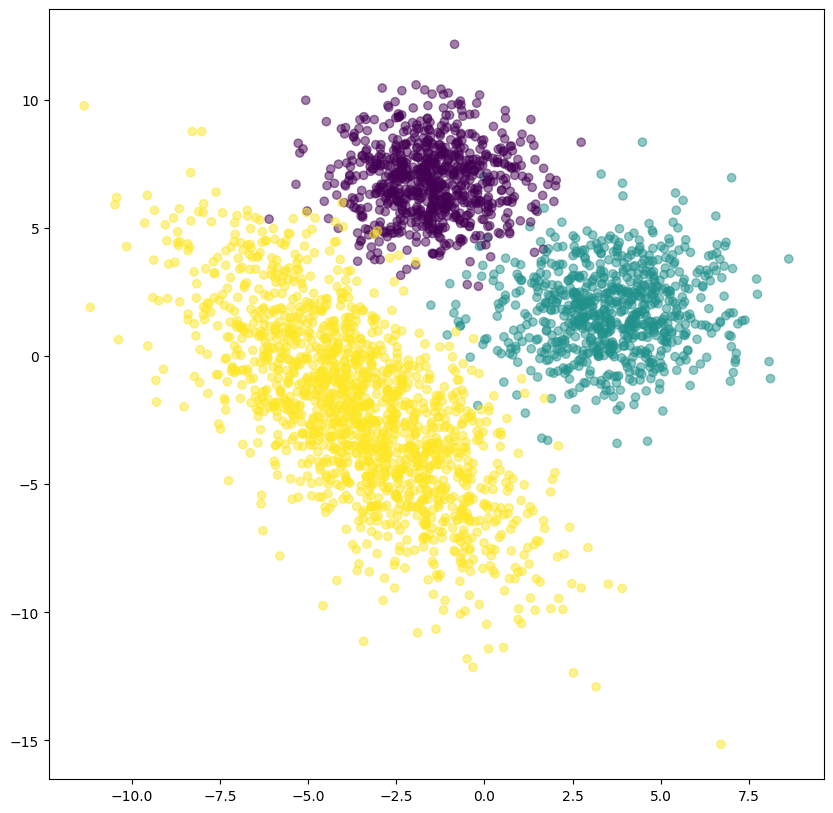

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Объект, который выполняет кластеризацию датасета с помощью алгоритма DBSCAN, инициализируется так:

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=35)

В отличие от K-means и AgglomerativeClustering, класс DBSCAN не имеет параметра n_clusters, поскольку DBSCAN автоматически определяет число кластеров в выборке.

Полный список параметров доступен в документации (англ.).

Обучение модели DBSCAN проходит аналогично обучению модели K-means:

In [13]:
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=35)

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [14]:
y_pred = dbscan.labels_

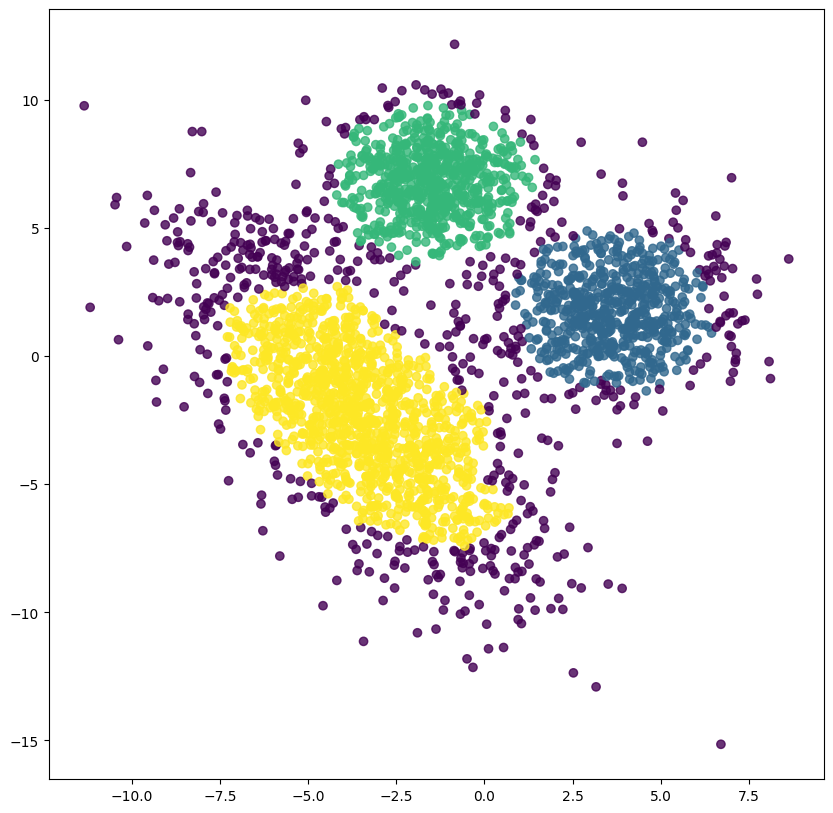

In [15]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
plt.show()

In [16]:

np.unique(y_pred, return_counts=True)


(array([-1,  0,  1,  2], dtype=int64),
 array([ 583,  603,  681, 1133], dtype=int64))